# Copula Optimised DCC-GARCH on AAPL x SPX

The purpose of this notebook is to check I implemented the model correctly. The ultimate goal is to apply it to the space weather context, but given DCC-GARCH lives in the financial domain, It would be difficult to determine if everything is working correctly if I jumped straight to that application. Hence this first notebook.

In [1]:
import pandas as pd
from dcc_implementation import *

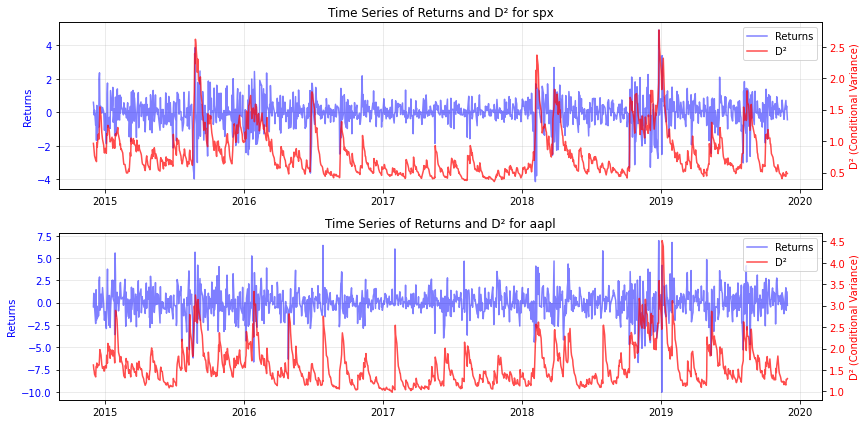

Optimization terminated successfully    (Exit mode 0)
            Current function value: 4730.936345970481
            Iterations: 9
            Function evaluations: 30
            Gradient evaluations: 9
T KS Stat: 0.0241, pval: 0.4524
BETA KS Stat: 0.1034, pval: 0.0000


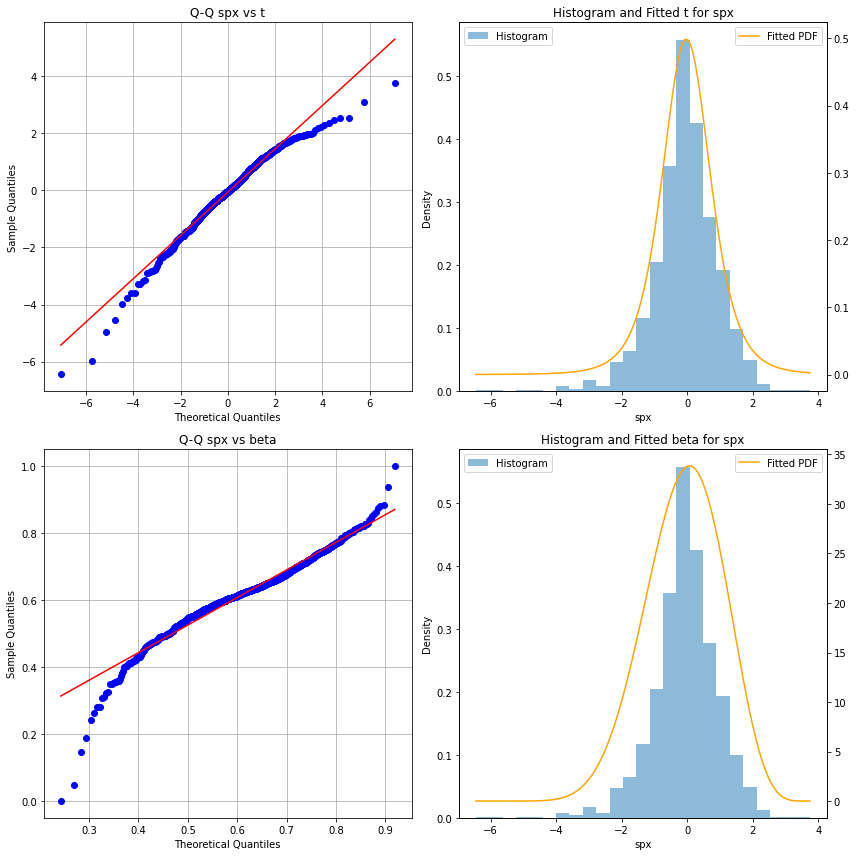

T KS Stat: 0.0158, pval: 0.9058
BETA KS Stat: 0.1147, pval: 0.0000


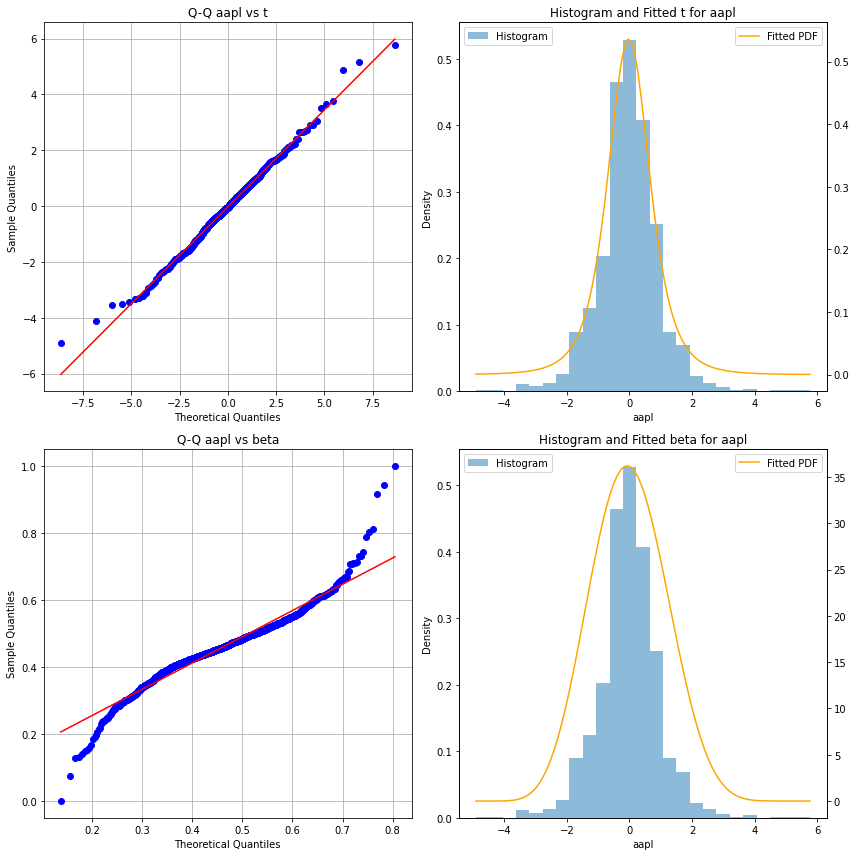

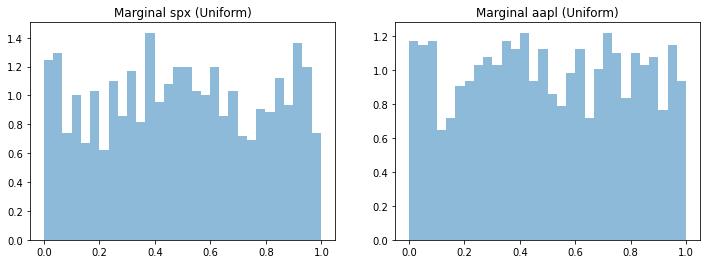

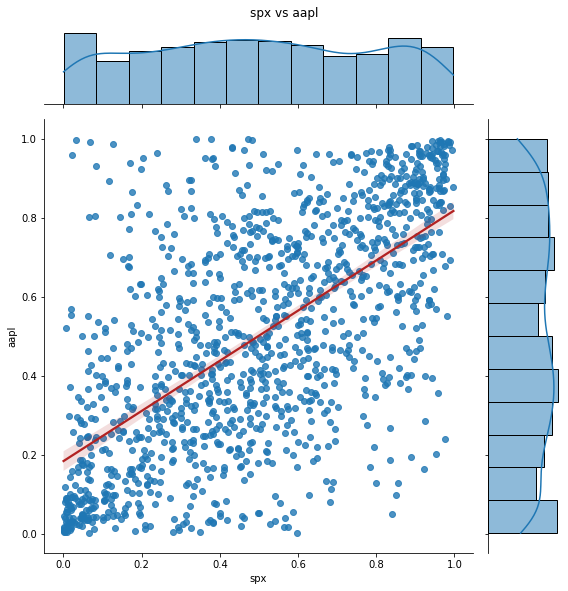

/Users/jonathankim/.pyenv/versions/.mlenv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/jonathankim/.pyenv/versions/.mlenv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/jonathankim/.pyenv/versions/.mlenv/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/jonathankim/.pyenv/versions/.mlenv/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


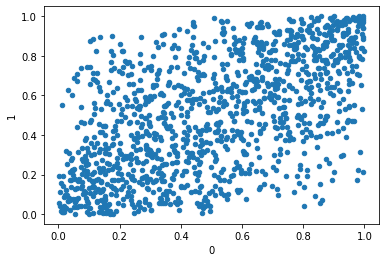

/Users/jonathankim/.pyenv/versions/.mlenv/lib/python3.9/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3967.565955314713
            Iterations: 2
            Function evaluations: 6
            Gradient evaluations: 2


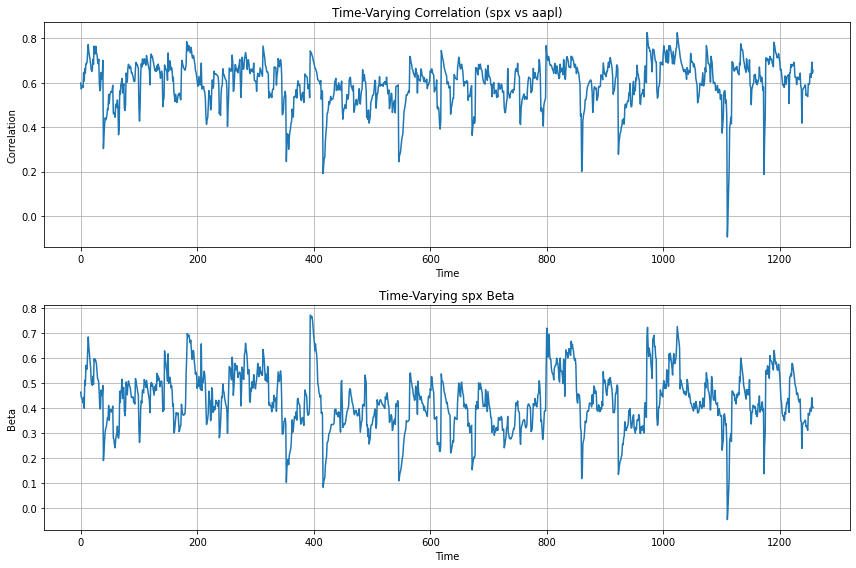

Simple copula LL: 0.2558898217120539
Optimized a, b: (0.07791266726466113, 0.7974911233904878)
Mean correlation: 0.6006146554720865
Mean correlation: 0.6006
True average correlation: 0.6732


In [2]:
# Load AAPL/SPX data
returns = pd.read_csv("../data/spx_aapl.csv")
returns.columns = ['date', 'spx', 'aapl']
returns.set_index("date", inplace=True)
returns.index = pd.to_datetime(returns.index)

# Initialize analyzer
analyzer = DCCGARCHAnalyzer(returns, columns=['spx', 'aapl'], output_dir='plots')

# Run full analysis with t-distribution for GARCH and copula
analyzer.run_full_analysis(garch_dist='t', copula_dist='t', initial_ab=(0.01, 0.7), initial_ab_copula=(0.01, 0.8))

# Display key outputs
print(f"Mean correlation: {np.mean(analyzer.R_t[:, 0, 1]):.4f}")
print(f"True average correlation: 0.6732")